# Técnicas de Machine Learning aplicadas a un problema de clasificación con desbalanceo

# Objetivo

Se propone el uso del dataset CocheRadar.csv para el estudio, análisis y diseño de la mejor técnica para crear un modelo de clasificación para clasificar en base a un conjunto de atributos numéricos, cuando un radar identifica a un coche o a otro vehículo. Para ver la descripción del dataset ver `CocheRadar.names`.

Actividades:

- Estudio, preprocesamiento y análisis del problema
- Descripción de la problemática, elección de técnicas, modelos de validación y métricas.
- Aplicación de modelos de validación, ajuste de parámetros en las técnicas y explicación de métricas y resultados.
- Comparativa, análisis y discusión de resultados


# Enfoque

Utilizaremos CocheRadar.csv para el estudio, análisis y diseño de la mejor técnica para crear un modelo de clasificación para clasificar en base a un conjunto de atributos numéricos, cuando un radar identifica a un coche o a otro vehículo. Como veremos el dataset está altamente desbalanceado.

Exploramos cómo distintas técnicas de clasificación (Random Forest, SVM y Regresión Logística) se desempeñan bajo tres escenarios de preprocesamiento del dataset. Evaluamos cada modelo con métricas clave como Accuracy, F1-Score y ROC-AUC para identificar el impacto de las estrategias de preprocesamiento y la idoneidad de cada técnica en la tarea de clasificación.

A continuación se muestra la arquitectura de la solución propuesta:
<BR>
<BR>



![Arquitectura](https://github.com/user-attachments/assets/bc5e1533-874b-4a75-9c07-8269ff477e34)


# Librerías

In [59]:
print("PROGRAMA DE CLASIFICACIÓN BASADO EN MACHINE LEARNING V1.0. 2024")
print("---------------------------------------------------------------")

PROGRAMA DE CLASIFICACIÓN BASADO EN MACHINE LEARNING V1.0. 2024
---------------------------------------------------------------


In [60]:
# Importaciones de librerías necesarias
import sys                        # Biblioteca estándar de Python para acceder a información del sistema
import numpy as np                # Librería para cálculos numéricos y operaciones con matrices
import pandas as pd               # Librería para análisis y manipulación de datos estructurados
import sklearn                    # Scikit-learn: Framework para aprendizaje automático
import seaborn as sns             # Librería para visualización de datos basada en matplotlib
import matplotlib.pyplot as plt   # Matplotlib: Biblioteca para gráficos y visualización
import imblearn                   # Biblioteca para técnicas de balanceo de clases en aprendizaje automático
import requests                   # Librería para realizar solicitudes HTTP (descargas y conexiones)

# Mostrar versiones de las librerías utilizadas
print("Versión de Python:", sys.version)
print("Versión de NumPy:", np.__version__)
print("Versión de pandas:", pd.__version__)
print("Versión de scikit-learn:", sklearn.__version__)
print("Versión de seaborn:", sns.__version__)
print("Versión de matplotlib:", plt.matplotlib.__version__)
print("Versión de imbalanced-learn:", imblearn.__version__)
print("Versión de requests:", requests.__version__)


Versión de Python: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Versión de NumPy: 1.26.4
Versión de pandas: 2.2.2
Versión de scikit-learn: 1.5.2
Versión de seaborn: 0.13.2
Versión de matplotlib: 3.8.0
Versión de imbalanced-learn: 0.12.4
Versión de requests: 2.32.3


# Carga del dataset

Primero, debemos cargar los datos desde la carpeta "Datasets" y explorar las primeras filas para verificar su estructura.

In [61]:

# URL del archivo
url = "https://github.com/aalonsopuig/InteligenciaArtificial/raw/main/ML_Clasif_Coches/CocheRadar.csv"

print()
print("DESCARGANDO DATASET DESDE INTERNET...")
# Descargar el archivo
response = requests.get(url)
if response.status_code == 200:
    with open("CocheRadar.csv", "wb") as file:
        file.write(response.content)
    print("Dataset descargado y guardado como 'CocheRadar.csv'")
else:
    print(f"Error al descargar el dataset. Código de estado: {response.status_code}")
print("--------------------------------------------------------")


DESCARGANDO DATASET DESDE INTERNET...
Dataset descargado y guardado como 'CocheRadar.csv'
--------------------------------------------------------


In [62]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('CocheRadar.csv')

# Ver las primeras filas para explorar el dataset
print()
print("PRIMERAS INSTANCIAS DEL DATASET:")
df.head()


PRIMERAS INSTANCIAS DEL DATASET:


,Compacto,Circularidad,Distancia_circular,Relación_radio,Relación_aspecto_praxis,Relación_aspecto_longitud_máx,Relación_dispersión,Alargamiento,Praxis_rectangular,Longitud_rectangular,Varianza_mayor,Varianza_menor,Rotación_radio,Asimetría_mayor,Asimetría_menor,Curtosis_menor,Curtosis_mayor,huecos,tipo
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,otros
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,otros
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,coche
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,otros
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,otros


**Campos dataset**

El dataset `Radar-Coches.csv` contiene información sobre las características de vehículos, con el objetivo de clasificar si un radar ha detectado un coche o cualquier otro vehículo.

Cada fila del dataset tiene atributos relacionados con el vehículo, que están representados por 18 columnas numéricas:

- `Compacto`: Medida que describe si el vehículo tiene una forma compacta.
- `Circularidad`: Representa cuán cerca es la forma del vehículo de ser un círculo.
- `Distancia_circular`: Relación que indica la distancia desde el centro de la forma del vehículo a un punto circular.
- `Relación_radio`: Relación entre los radios de la forma del vehículo.
- `Relación_aspecto_praxis`: Relación entre el aspecto de la praxis del vehículo.
- `Relación_aspecto_longitud_máx`: Relación entre el aspecto y la longitud máxima.
- `Relación_dispersión`: Mide la dispersión de los datos en función del vehículo.
- `Alargamiento`: Medida que indica el grado de alargamiento del vehículo.
- `Praxis_rectangular`: Describe cómo se ajusta el vehículo a una forma rectangular.
- `Longitud_rectangular`: Longitud medida en una forma rectangular.
- `Varianza_mayor`: Medida de la varianza mayor de las características geométricas del vehículo.
- `Varianza_menor`: Medida de la varianza menor de las características geométricas del vehículo.
- `Rotación_radio`: Indica la rotación alrededor del radio del vehículo.
- `Asimetría_mayor`: Medida de la asimetría mayor.
- `Asimetría_menor`: Medida de la asimetría menor.
- `Curtosis_menor`: Mide la curtosis menor.
- `Curtosis_mayor`: Mide la curtosis mayor.
- `Huecos`: Número de huecos presentes en el vehículo.

El objetivo es predecir la columna `tipo`, que indica si el vehículo detectado es un coche o otros vehículos.

# Exploración del Dataset

Una vez cargado, realizamos una exploración de los datos


## Tipos de datos y estadísticas descriptivas

In [63]:
# Comprobar los tipos de datos y valores nulos
print("--------------------------------------------------------")
print()
print("INFORMACIÓN DEL DATASET ORIGINAL:")
print(df.info())

# Estadísticas descriptivas de los atributos
print()
print("ESTADÍSTICAS DESCRIPTIVAS DE LOS ATRIBUTOS:")
print(df.describe())

# Ver la distribución de la variable objetivo
print()
print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
print(df['tipo'].value_counts())
print("--------------------------------------------------------")

--------------------------------------------------------

INFORMACIÓN DEL DATASET ORIGINAL:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Compacto                       846 non-null    int64 
 1   Circularidad                   846 non-null    int64 
 2   Distancia_circular             846 non-null    int64 
 3   Relación_radio                 846 non-null    int64 
 4   Relación_aspecto_praxis        846 non-null    int64 
 5   Relación_aspecto_longitud_máx  846 non-null    int64 
 6   Relación_dispersión            846 non-null    int64 
 7   Alargamiento                   846 non-null    int64 
 8   Praxis_rectangular             846 non-null    int64 
 9   Longitud_rectangular           846 non-null    int64 
 10  Varianza_mayor                 846 non-null    int64 
 11  Varianza_menor                 

*Análisis de estos datos: El análisis de las estadísticas descriptivas del dataset CocheRadar.csv revela que todas las variables numéricas tienen 846 instancias, lo que indica que no hay valores faltantes. Las medidas como la media, los percentiles y los rangos (mínimos y máximos) muestran una variabilidad significativa entre las características, con algunos rangos amplios, como en Varianza_menor (máximo de 1018) y Rotación_radio. Estas observaciones sugieren la posibilidad de valores extremos o outliers.*

**Boxplot**: Generamos un boxplot que muestre la distribución de todas las características en el dataset

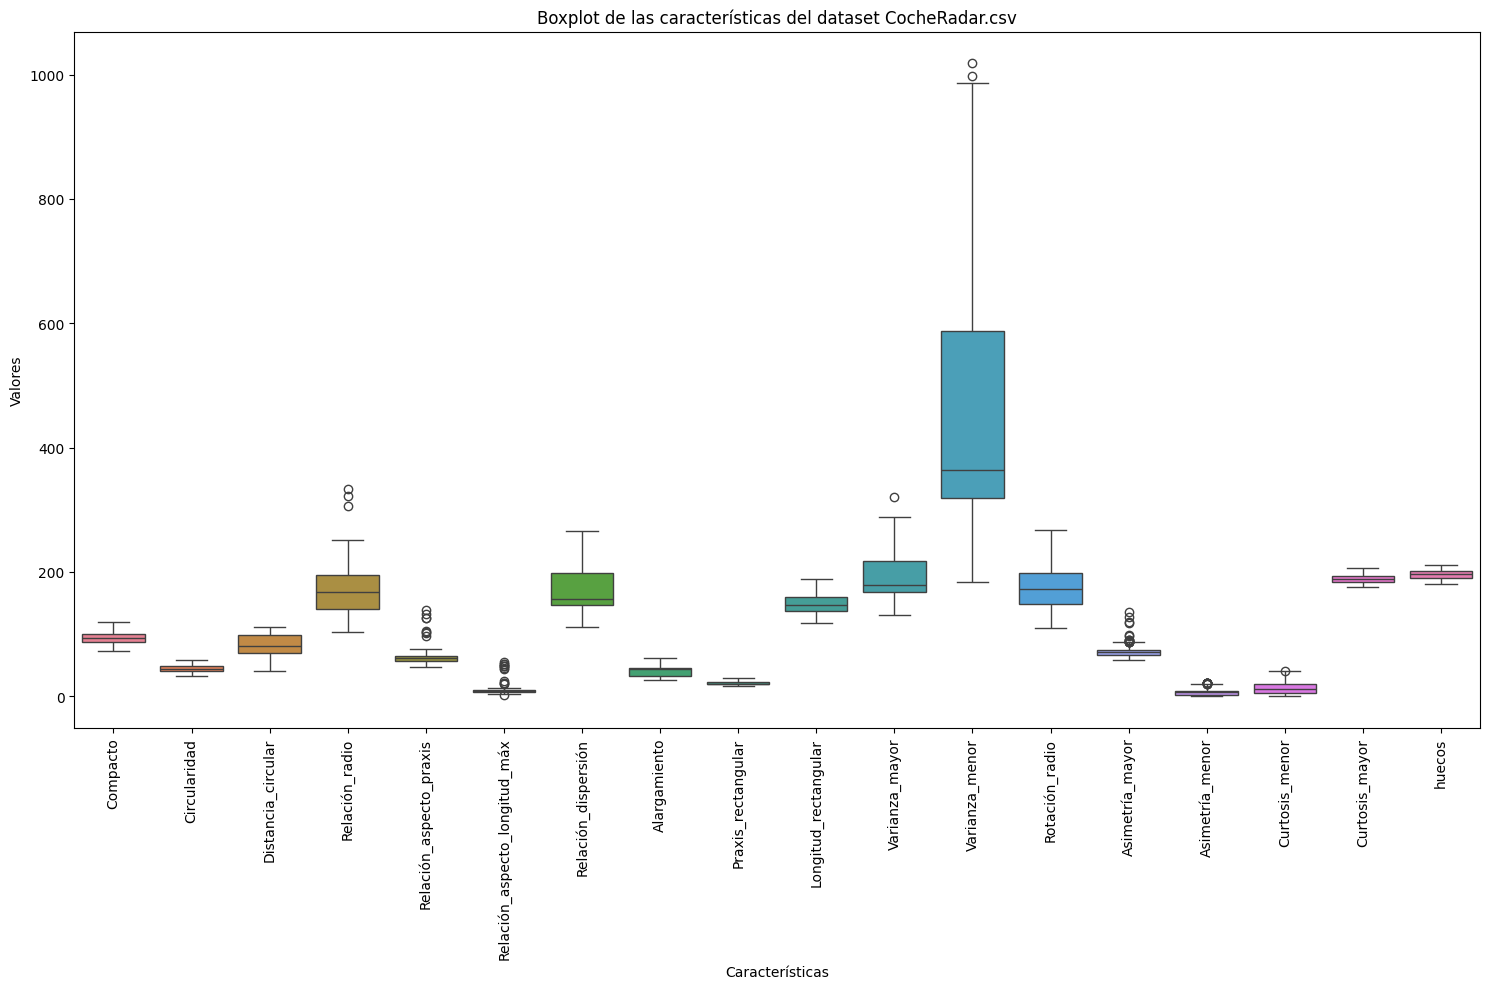

In [64]:

# Crear un boxplot para todas las características numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns='tipo'))  # Excluimos la columna 'tipo' porque es la etiqueta
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para que se vean bien
plt.title('Boxplot de las características del dataset CocheRadar.csv')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

*Análisis de estos datos: El rango desigual de las variables resalta la necesidad de aplicar técnicas de escalado, como StandardScaler, para garantizar que todas las características estén en la misma escala antes del modelado. Además, las posibles anomalías en los datos podrían requerir un análisis de outliers para evaluar su impacto en el rendimiento de los modelos de clasificación*.

**Valores nulos**: Verificamos si hay valores nulos:

In [65]:
# Verifica si hay valores nulos
print()
print("NUMERO DE VALORES NULOS EN CARACTERÍSTICAS:")
print(df.isnull().sum())
print("--------------------------------------------------------")


NUMERO DE VALORES NULOS EN CARACTERÍSTICAS:
Compacto                         0
Circularidad                     0
Distancia_circular               0
Relación_radio                   0
Relación_aspecto_praxis          0
Relación_aspecto_longitud_máx    0
Relación_dispersión              0
Alargamiento                     0
Praxis_rectangular               0
Longitud_rectangular             0
Varianza_mayor                   0
Varianza_menor                   0
Rotación_radio                   0
Asimetría_mayor                  0
Asimetría_menor                  0
Curtosis_menor                   0
Curtosis_mayor                   0
huecos                           0
tipo                             0
dtype: int64
--------------------------------------------------------


*Análisis de estos datos: No hay valores nulos*

**Valores faltantes**: Revisamos si hay valores faltantes:

In [66]:
# Comprobar si hay valores faltantes en el dataset
missing_values = df.isnull().sum()

# Mostrar el número de valores faltantes por columna
print()
print("VALORES FALTANTES DE LOS ATRIBUTOS:")
print(missing_values)
print("--------------------------------------------------------")


VALORES FALTANTES DE LOS ATRIBUTOS:
Compacto                         0
Circularidad                     0
Distancia_circular               0
Relación_radio                   0
Relación_aspecto_praxis          0
Relación_aspecto_longitud_máx    0
Relación_dispersión              0
Alargamiento                     0
Praxis_rectangular               0
Longitud_rectangular             0
Varianza_mayor                   0
Varianza_menor                   0
Rotación_radio                   0
Asimetría_mayor                  0
Asimetría_menor                  0
Curtosis_menor                   0
Curtosis_mayor                   0
huecos                           0
tipo                             0
dtype: int64
--------------------------------------------------------


*Análisis de estos datos: No hay valores faltantes*

## Análisis de correlaciones

Este código realiza un Label Encoding de la columna `tipo` para convertir las categorías en valores numéricos, selecciona solo las columnas numéricas del dataset y luego calcula y visualiza la matriz de correlación entre ellas.

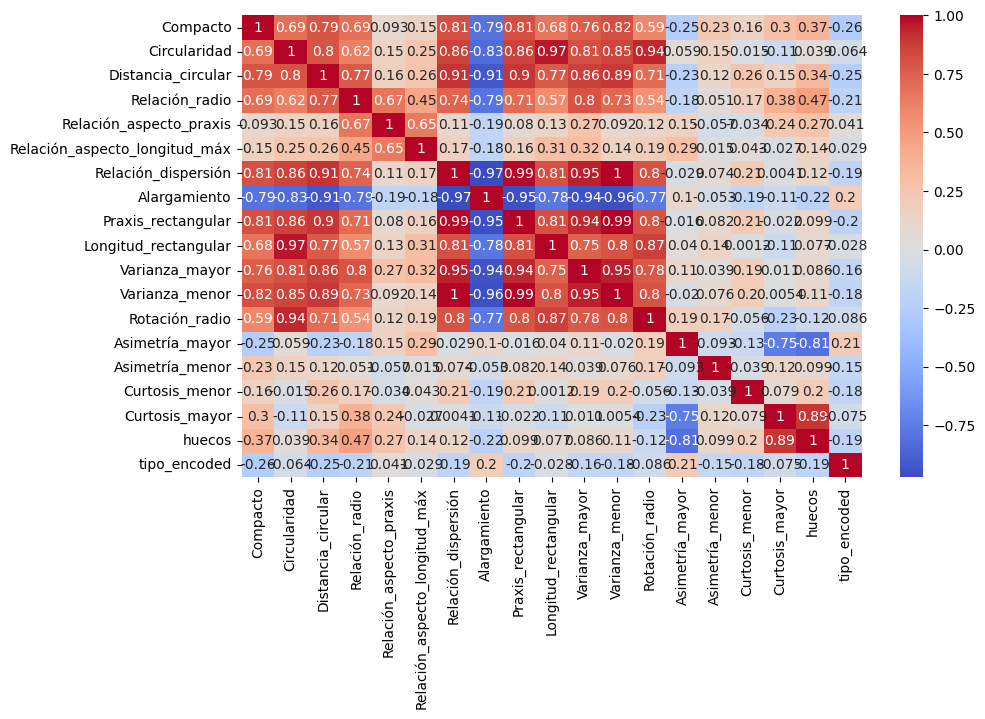

In [67]:
from sklearn.preprocessing import LabelEncoder

# Realizamos Label Encoding de la columna 'tipo'
encoder = LabelEncoder()
df['tipo_encoded'] = encoder.fit_transform(df['tipo'])

# Asegurarnos de que solo estamos utilizando las columnas numéricas para la correlación
df_numeric = df.select_dtypes(include=[np.number])

# Calcular y visualizar la correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()


*Análisis de Correlaciones Fuertes*:

- *Relación dispersión muestra una relación casi perfecta con Praxis rectangular (0.99) y Varianza menor (0.99). Los vehículos con mayor dispersión tienden a tener formas más rectangulares y una mayor varianza en sus características geométricas.*
  
- *Alargamiento tiene una fuerte correlación negativa con Relación dispersión (-0.97) y Praxis rectangular (-0.95), sugiriendo que los vehículos más alargados tienen formas más dispersas y menos rectangulares.*

- *Praxis rectangular y Longitud rectangular están fuertemente correlacionadas (0.81), lo que indica que los vehículos con mayor longitud rectangular también son más rectangulares en su forma.*

- *Rotación radio está fuertemente correlacionada con Circularidad (0.94) y Varianza menor (0.80), sugiriendo que los vehículos con mayor rotación también tienden a ser más circulares y tener una mayor varianza en sus características geométricas.*

*Conclusiones*:
- *Las relaciones entre Relación dispersión, Praxis rectangular, y Varianza menor sugieren que las formas geométricas de los vehículos están altamente interconectadas.*
- *El Alargamiento afecta negativamente a la dispersión y la rectangularidad de los vehículos.*
- *Las correlaciones entre Longitud rectangular y Praxis rectangular muestran que las formas rectangulares y las longitudes mayores están estrechamente relacionadas.*


## Desbalanceo

Mostramos gráficamente los valores de `tipo`, para observar el desbalanceo.

<ipython-input-68-9c49952306c3>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['tipo'], sort=True)


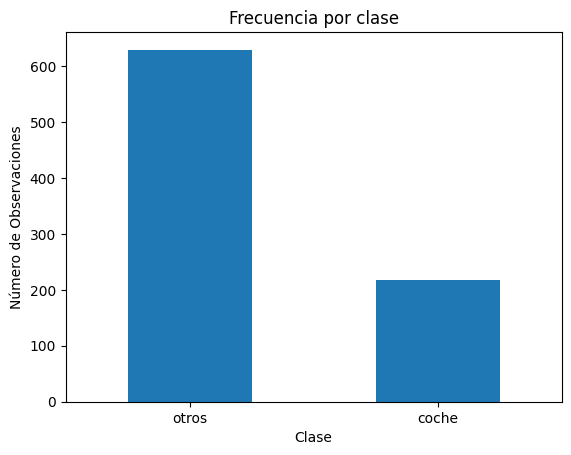

In [68]:

# Contamos las frecuencias de cada clase
count_classes = pd.value_counts(df['tipo'], sort=True)

# Graficamos las frecuencias de las clases
count_classes.plot(kind='bar', rot=0)

# Títulos y etiquetas
plt.title("Frecuencia por clase")
plt.xlabel("Clase")
plt.ylabel("Número de Observaciones")
plt.show()


*Análisis de estos datos*:

*El atributo objetivo, tipo, muestra un claro desbalanceo entre las dos clases. Hay 629 observaciones de "otros" vehículos y 217 de "coche", lo que sugiere que la clase "otros" es más prevalente*.

*Este desbalanceo debe ser tenido en cuenta al aplicar técnicas de clasificación, ya que los modelos podrían tener un sesgo hacia la clase mayoritaria*.

*Posibles acciones*:

- *Manejo de desbalanceo: Dado el desbalanceo, será recomendable aplicar técnicas como undersampling o oversampling para equilibrar el dataset antes de entrenar los modelos.*
- *Preprocesamiento y normalización: Algunos atributos, como `huecos`, tienen una variabilidad limitada, mientras que otros tienen rangos más amplios. Sería conveniente normalizar o estandarizar los datos antes de pasar a la fase de modelado.*

# Preprocesamiento

## Análisis preliminar

Podemos hacer un análisis preliminar basado en toda la información anterior:


**Correlaciones altas entre variables**:
   
   Existen varias correlaciones fuertes entre las variables del dataset, especialmente entre `Relación_dispersión`, `Praxis_rectangular`, `Varianza_menor` y `Longitud_rectangular`. Estas relaciones indican que algunas de las características del dataset están muy interrelacionadas. Cuando las variables están fuertemente correlacionadas, puede ser útil reducir la dimensionalidad para evitar redundancias y mejorar la eficiencia de los modelos, al tiempo que se disminuye el riesgo de sobreajuste.

**Manejo de la variable objetivo ("tipo")**:

   La variable `tipo` es categórica con dos posibles valores: "coche" y "otros". Esto sugiere convertir estos valores en valores numéricos (0 y 1) (**LabelEncoding**). Este es un paso correcto para la mayoría de los modelos de clasificación que requieren datos numéricos.
   
   En algunos casos, especialmente si se va a utilizar un modelo como SVM o Redes Neuronales, podría ser útil aplicar **One-Hot Encoding** para evitar problemas con los algoritmos que podrían interpretar el valor de la variable `tipo` como ordinal.

**Normalización**:

   Muchas de las variables tienen rangos de magnitud muy diferentes (por ejemplo, `Relación_aspecto_praxis` varía entre 47 y 138, mientras que `huecos` tiene un rango mucho más pequeño). El escalado de las variables es fundamental, especialmente cuando se utilizan algoritmos de aprendizaje automático como **KNN** o **SVM**, que son sensibles a las diferencias de escala.
   
   Consideraremos usar **StandardScaler** o **MinMaxScaler** para llevar las características a una escala comparable y mejorar el rendimiento de los modelos.

**Reducción de dimensionalidad**:

   - **PCA (Análisis de Componentes Principales)**: Dado que hay variables altamente correlacionadas, se puede usar PCA (Principal Component Analysis) para reducir la dimensionalidad. PCA transforma las variables originales en un conjunto de variables lineales no correlacionadas (componentes principales) y puede ser útil para capturar la mayor parte de la varianza con un menor número de dimensiones.
   
   - **Selección de características**: Otra opción es usar técnicas de *selección de características*, como la eliminación recursiva de características (RFE) o la selección basada en la importancia de las características (por ejemplo, usando modelos como los árboles de decisión). Esto permite identificar las variables más importantes y eliminar las redundantes o irrelevantes.

**Manejo de posibles valores atípicos**:

   Dado que algunas variables presentan rangos amplios (por ejemplo, `Varianza_mayor` tiene un valor máximo de 320), es posible que haya valores atípicos (outliers) que podrían afectar el rendimiento de algunos modelos. Sería útil realizar un análisis de los valores atípicos (por ejemplo, mediante diagramas de caja o análisis de z-scores) y decidir si se deben eliminar o ajustar.
   
   Si se detectan outliers, podría ser conveniente aplicar técnicas de recorte de valores extremos o usar modelos que sean menos sensibles a estos outliers, como **árboles de decisión** o **random forest**.

**Manejo del desbalanceo**:

En el caso del dataset Radar-Coches.csv, se observa un desbalanceo de clases entre los vehículos etiquetados como "coche" (217 muestras) y los clasificados como "otros" (629 muestras). Este tipo de desbalanceo puede afectar la capacidad del modelo para generalizar y predecir correctamente la clase minoritaria. Para mitigar este problema, se pueden aplicar diversas estrategias:

- Sobremuestreo (SMOTE): Aumentar la clase minoritaria generando instancias sintéticas.
- Submuestreo: Reducir el tamaño de la clase mayoritaria para equilibrar el dataset.
- Ajuste de la Función de Pérdida: Modificar la función de pérdida para que penalice más los errores de la clase minoritaria.
- Métodos de Ensemble: Utilizar clasificadores que manejan el desbalanceo de manera nativa, como Balanced Random Forest o EasyEnsemble.
- Evaluación con Métricas Apropiadas: Usar F1-Score, AUC-ROC y matriz de confusión para evaluar el desempeño, en lugar de solo la precisión.


## Propuestas para el preprocesamiento

El preprocesamiento ayudará a que el modelo funcione de manera más eficiente y evite problemas como el sobreajuste o la falta de precisión debido a características redundantes o mal escaladas.

Las acciones que llevaremos a cabo serán:

- **Codificación de variables categóricas**: Usar Label Encoding.
- **Normalización**: Aplicar StandardScaler para que las características estén en la misma escala.
- **Reducción de dimensionalidad**: Utilizar PCA y/o selección de características para reducir la redundancia de las variables correlacionadas.
- **Manejo de outliers**: Aplicaremos un enfoque híbrido eliminando solo los valores que coinciden entre dos métodos (z-scores e IQR)
- **Manejo del desbalanceo**: Aumentar la clase minoritaria con SMOTE generando instancias sintéticas.




## Codificación de variables categóricas

El código siguiente utiliza **LabelEncoder** para convertir la variable categórica `tipo` en una nueva columna `tipo_encoded` con valores numéricos (`0` y `1`) que pueden ser usados en modelos de aprendizaje automático.


In [69]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()
print("APLICANDO LABEL-ENCODER A LA ETIQUETA (TIPO)...")
# Aplicar Label Encoding a la columna 'tipo'
df['tipo_encoded'] = label_encoder.fit_transform(df['tipo'])

# Mostrar las primeras filas del dataset con la columna codificada
print()
print("PRIMERAS FILAS DEL DATASET TRAS APLICAR CODIFICACIÓN LABEL-ENCODER A LA ETIQUETA:")
print(df[['tipo', 'tipo_encoded']].head())
print("--------------------------------------------------------")

APLICANDO LABEL-ENCODER A LA ETIQUETA (TIPO)...

PRIMERAS FILAS DEL DATASET TRAS APLICAR CODIFICACIÓN LABEL-ENCODER A LA ETIQUETA:
    tipo  tipo_encoded
0  otros             1
1  otros             1
2  coche             0
3  otros             1
4  otros             1
--------------------------------------------------------


## Normalización

Este código normaliza las columnas numéricas del dataset utilizando **StandardScaler**, excluyendo las categóricas, ajustando las características para que tengan media 0 y desviación estándar 1.



In [70]:
from sklearn.preprocessing import StandardScaler

print("APLICANDO NORMALIZACIÓN...")
# Crear el escalador
scaler = StandardScaler()

# Aplicar la normalización a todas las columnas excepto 'tipo', 'tipo_encoded'
columns_to_scale = df.columns.difference(['tipo', 'tipo_encoded'])
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Verificar el resultado
print()
print("PRIMERAS FILAS DEL DATASET TRAS APLICAR NORMALIZACIÓN:")
print(df.head())
print("--------------------------------------------------------")

APLICANDO NORMALIZACIÓN...

PRIMERAS FILAS DEL DATASET TRAS APLICAR NORMALIZACIÓN:
   Compacto  Circularidad  Distancia_circular  Relación_radio  \
0  0.160580      0.508950            0.057819        0.270806   
1 -0.325470     -0.626268            0.121261       -0.835244   
2  1.254193      0.833298            1.517005        1.197496   
3 -0.082445     -0.626268           -0.005624       -0.297166   
4 -1.054545     -0.139746           -0.766939        1.077923   

   Relación_aspecto_praxis  Relación_aspecto_longitud_máx  \
0                 1.307291                       0.311542   
1                -0.595396                       0.094079   
2                 0.546217                       0.311542   
3                 0.165679                       0.094079   
4                 5.239511                       9.444962   

   Relación_dispersión  Alargamiento  Praxis_rectangular  \
0            -0.205844      0.136570           -0.224944   
1            -0.597112      0.520843   

*Análisis de estos resultados:*

*El resultado de aplicar StandardScaler al dataset muestra que las características numéricas han sido escaladas para tener una media cercana a 0 y una desviación estándar cercana a 1. Esto se refleja en los valores transformados, que ahora están en un rango más uniforme, lo que facilita el desempeño de los algoritmos sensibles a la escala, como SVM y KNN*.

*Por ejemplo, columnas como Compacto, Circularidad, y Relación_aspecto_praxis, que tenían rangos muy diferentes, ahora tienen valores comparables. Esto no afecta directamente la etiqueta objetivo (tipo o tipo_encoded), ya que se mantiene separada para evitar transformaciones innecesarias*.

**Boxplot**: Generamos un boxplot que muestre la distribución de todas las características en el dataset

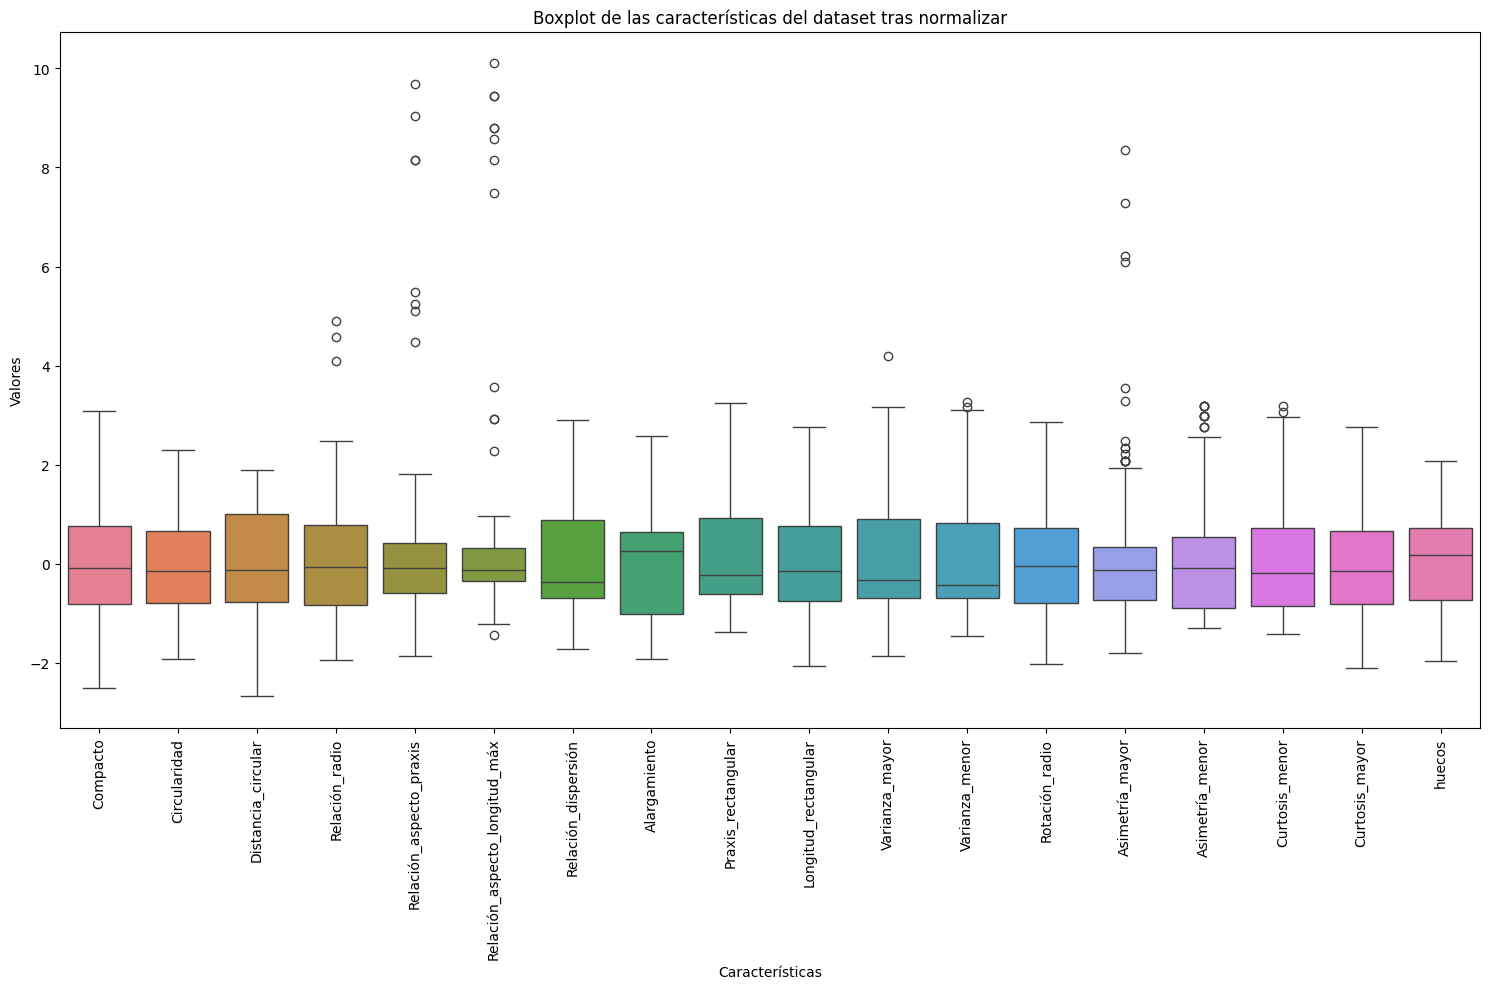

In [71]:
# Crear un boxplot para todas las características numéricas
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['tipo', 'tipo_encoded']))  # Excluimos la columna 'tipo', 'tipo_encoded' porque es la etiqueta
plt.xticks(rotation=90)  # Rotar las etiquetas del eje X para que se vean bien
plt.title('Boxplot de las características del dataset tras normalizar')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()

*Análisis de estos resultados*:

*Al observar este gráfico, se puede concluir que*:

- *La mayoría de las características están bien distribuidas y centradas alrededor de 0, como era esperado tras la normalización*.
- *Algunas características, como Relación_aspecto_longitud_máx y Asimetría_mayor, presentan outliers notables*.
- *El rango de valores de las características ahora es comparable, lo que favorece el desempeño de algoritmos sensibles a las escalas*.

## Reducción de dimensionalidad

Mostraremos tanto la aplicación de **PCA** como de **selección de características**. Según cual se quiera utilizar, se ejecutará una u otra.

**PCA (Análisis de Componentes Principales)**:

Este método transforma las variables originales en un conjunto de componentes principales no correlacionadas, que capturan la mayor parte de la varianza del dataset.

`selected_df` es el DataFrame resultante tras aplicar PCA, que contiene únicamente las características más relevantes del conjunto original junto con la etiqueta codificada (`tipo_encoded`).

In [72]:
from sklearn.decomposition import PCA

print()
print("APLICANDO PCA...")

# Separar características y la variable objetivo
X_scaled = df.drop(columns=['tipo', 'tipo_encoded'])
y = df['tipo']
y_encoded = df['tipo_encoded']

# Aplicar PCA y conservar componentes que expliquen el 95% de la varianza
pca = PCA(n_components=0.95)  # Mantener 95% de la varianza
X_pca = pca.fit_transform(X_scaled)

# Crear un nuevo DataFrame con las componentes principales
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Añadir la etiqueta codificada al DataFrame
selected_df_pca = pd.concat([X_pca_df, df['tipo_encoded']], axis=1)

# Verificar el resultado
print()
print("PRIMERAS FILAS DEL DATASET RESULTANTE DE APLICAR REDUCCIÓN DE DIMENSIONALIDAD (PCA):")
print(selected_df_pca.head())

# Mostrar variacion de dimensionalidad
print()
print("COMPARATIVA DE DIMENSIONES ANTES Y DESPUÉS DE PCA:")
print(f"Dimensiones originales: {df.shape}")
print(f"Dimensiones después de PCA: {selected_df_pca.shape}")
print("--------------------------------------------------------")


APLICANDO PCA...

PRIMERAS FILAS DEL DATASET RESULTANTE DE APLICAR REDUCCIÓN DE DIMENSIONALIDAD (PCA):
        PC1       PC2        PC3       PC4       PC5       PC6       PC7  \
0  0.330282  0.214485   0.997281 -0.171990  0.082654  0.726896 -0.915154   
1 -1.594166  0.422133  -0.368876 -0.232284  0.692313  0.528644  0.356671   
2  3.761281 -0.188004   0.088679 -1.201172  0.719231 -0.704778 -0.010315   
3 -1.742690  2.823370   0.112525 -0.374080 -0.368366  0.506801  0.451447   
4  0.551323 -4.768797  11.686256 -0.166534  3.244040  0.298781  2.662626   

   tipo_encoded  
0             1  
1             1  
2             0  
3             1  
4             1  

COMPARATIVA DE DIMENSIONES ANTES Y DESPUÉS DE PCA:
Dimensiones originales: (846, 20)
Dimensiones después de PCA: (846, 8)
--------------------------------------------------------


*Análisis de estos resultados*:

*El dataset `selected_df_pca` muestra las instancias transformadas en un espacio reducido de componentes principales (PC1, PC2, ..., PC7) tras aplicar PCA. Estas nuevas variables son combinaciones lineales de las características originales y explican la mayor parte de la varianza del dataset, permitiendo trabajar con menos dimensiones mientras se preserva la información clave.*

**Selección de características**:

El siguiente código realiza una selección automática de las características más relevantes del dataset utilizando un modelo de **Random Forest** basado en la importancia de las variables, lo que es útil en nuestro caso para reducir dimensionalidad, eliminar redundancia y mejorar la eficiencia y rendimiento de los modelos de clasificación.

`selected_df` es el DataFrame resultante tras aplicar la selección de características con Random Forest, que contiene únicamente las características más relevantes del conjunto original junto con la etiqueta codificada (`tipo_encoded`).

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

print()
print("APLICANDO SELECCIÓN DE CARACTERÍSTICAS...")

# Separar características y la variable objetivo
X_scaled = df.drop(columns=['tipo', 'tipo_encoded'])
y = df['tipo']
y_encoded = df['tipo_encoded']

# Inicializamos el modelo Random Forest
rf_model = RandomForestClassifier(random_state=123, n_estimators=100)

# Entrenamos el modelo con las características y la variable objetivo
rf_model.fit(X_scaled, df['tipo_encoded'])

# Visualizamos la importancia de las características
importances = rf_model.feature_importances_
print()
print("PESO DE CADA CARACTERÍSTICA EN LA PREDICCIÓN DE LA ETIQUETA:")
for i, col in enumerate(df.drop(columns=['tipo', 'tipo_encoded']).columns):
    print(f'Importancia de {col}: {importances[i]:.4f}')

# Selección de características basada en la importancia (umbral automático)
selector = SelectFromModel(rf_model, prefit=True)
X_selected = selector.transform(X_scaled)

# Convertimos X_selected en un DataFrame con los nombres de las características seleccionadas
selected_features = df.drop(columns=['tipo', 'tipo_encoded']).columns[selector.get_support()]
selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Añadimos la columna 'tipo_encoded' al DataFrame reducido
selected_df['tipo_encoded'] = df['tipo_encoded']

# Visualizamos las primeras filas del dataset reducido
print()
print("PRIMERAS FILAS DEL DATASET RESULTANTE DE APLICAR REDUCCIÓN DE DIMENSIONALIDAD (SELECCIÓN DE CARACTERÍSTICAS):")
print(selected_df.head())

# Mostrar variacion de dimensionalidad
print()
print("COMPARATIVA DE DIMENSIONES ANTES Y DESPUÉS:")
print(f"Dimensiones originales: {df.shape}")
print(f"Dimensiones después de Selección de características: {selected_df.shape}")
print("--------------------------------------------------------")



APLICANDO SELECCIÓN DE CARACTERÍSTICAS...

PESO DE CADA CARACTERÍSTICA EN LA PREDICCIÓN DE LA ETIQUETA:
Importancia de Compacto: 0.0705
Importancia de Circularidad: 0.0467
Importancia de Distancia_circular: 0.0571
Importancia de Relación_radio: 0.0521
Importancia de Relación_aspecto_praxis: 0.0578
Importancia de Relación_aspecto_longitud_máx: 0.0483
Importancia de Relación_dispersión: 0.0564
Importancia de Alargamiento: 0.0456
Importancia de Praxis_rectangular: 0.0121
Importancia de Longitud_rectangular: 0.0712
Importancia de Varianza_mayor: 0.0551
Importancia de Varianza_menor: 0.0865
Importancia de Rotación_radio: 0.0633
Importancia de Asimetría_mayor: 0.0636
Importancia de Asimetría_menor: 0.0516
Importancia de Curtosis_menor: 0.0546
Importancia de Curtosis_mayor: 0.0414
Importancia de huecos: 0.0661

PRIMERAS FILAS DEL DATASET RESULTANTE DE APLICAR REDUCCIÓN DE DIMENSIONALIDAD (SELECCIÓN DE CARACTERÍSTICAS):
   Compacto  Distancia_circular  Relación_aspecto_praxis  Relación_disper

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


*Análisis de estos resultados:*

*Tras aplicar la selección de características mediante Random Forest, se calcularon las importancias de cada variable en el modelo. Estas importancias indican el peso relativo de cada característica en la predicción de la etiqueta objetivo. Las características con mayor importancia, como Varianza_menor (0.0865), Longitud_rectangular (0.0712) y huecos (0.0661), son las que más contribuyen al modelo, mientras que características como Praxis_rectangular (0.0121) tienen un impacto mucho menor. Esta información es útil para reducir dimensionalidad y centrar el modelo en las variables más relevantes, optimizando el rendimiento y la interpretación del modelo.*

## Selección de instancias

Incorporar selección de instancias es una estrategia valiosa en el preprocesamiento, especialmente si se observa que el dataset contiene ejemplos ruidosos, redundantes o confusos.

En nuestro caso lo abordaremos con la siguiente estrategia:

- Estrategia con outliers
- Estrategia con redundancias
- Estrategia con algoritmos de selección

### Estrategia con outliers

Dado que las características ya han sido seleccionadas, podemos identificar los outliers dentro de estas características seleccionadas con z-scores o con IQR.

**Usar z-scores**:
Calcula los z-scores para los valores de x_dimensionada y detecta puntos que se alejan más de un umbral, como 3 o -3.

In [74]:
from scipy.stats import zscore

print()
print("ANALISIS OUTLIERS (Z-SCORE)...")
# Separar las características y la etiqueta
X_features = selected_df.drop(columns=['tipo_encoded'])

# Calcular los z-scores para las características
z_scores = np.abs(zscore(X_features))

# Definir el umbral para considerar un valor como outlier (generalmente z > 3)
z_outliers = np.where(z_scores > 3)

# Identificar las instancias con outliers
outlier_instances = np.unique(z_outliers[0])

print(f"Instancias con outliers: {len(outlier_instances)}")


ANALISIS OUTLIERS (Z-SCORE)...
Instancias con outliers: 13


**Usar rango intercuartil (IQR)**:
Otra opción es identificar valores fuera del rango típico basado en el IQR.

In [75]:
print()
print("ANALISIS OUTLIERS (IQR)...")

# Separar las características y la etiqueta
X_features = selected_df.drop(columns=['tipo_encoded']).values

# Calcular Q1, Q3 y el rango intercuartil (IQR)
Q1 = np.percentile(X_features, 25, axis=0)  # Primer cuartil (Q1)
Q3 = np.percentile(X_features, 75, axis=0)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartílico

# Identificar outliers como puntos fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = np.where((X_features < lower_bound) | (X_features > upper_bound))

# Identificar las instancias con outliers
outlier_instances = np.unique(iqr_outliers[0])
print(f"Instancias con outliers: {len(outlier_instances)}")



ANALISIS OUTLIERS (IQR)...
Instancias con outliers: 17


**Decisión sobre qué hacer con los outliers**: Tenemos varias opciones

- Eliminar registros con outliers
- Modificar valores extremos (winsorizing)
- Dejar los outliers y usar modelos robustos como árboles de decisión, Random Forest o Gradient Boosting, que no se ven afectados significativamente por los outliers.

**Alternativa intermedia**: Aplicaremos un enfoque híbrido eliminando solo los valores que coinciden entre ambos métodos (z-scores e IQR), ya que es probable que sean los outliers más significativos.

`selected_df_no_common_outliers` es el DataFrame resultante después de eliminar las filas correspondientes a los índices de las instancias que fueron detectadas como outliers por ambos métodos (Z-score e IQR). Contiene tanto las características seleccionadas del dataset como la etiqueta codificada (`tipo_encoded`), ya que es un subconjunto de `selected_df` con las instancias no consideradas como outliers.

In [76]:
print()
print("ELIMINACIÓN DE OUTLIERS COMUNES...")

# Encontrar índices de outliers detectados por Z-score e IQR
outlier_instances_zscore = np.unique(z_outliers[0])  # Índices de Z-score
outlier_instances_iqr = np.unique(iqr_outliers[0])   # Índices de IQR

# Encontrar outliers comunes entre ambos métodos
common_outliers = np.intersect1d(outlier_instances_zscore, outlier_instances_iqr)

# Mostrar el número de outliers detectados por cada método y en común
print(f"Instancias con outliers por Z-scores: {len(outlier_instances_zscore)}")
print(f"Instancias con outliers por IQR: {len(outlier_instances_iqr)}")
print(f"Instancias con outliers comunes (híbrido): {len(common_outliers)}")

# Crear un nuevo DataFrame eliminando outliers comunes
selected_df_no_common_outliers = selected_df.drop(index=common_outliers).reset_index(drop=True)
print(f"Dimensiones del DataFrame sin outliers comunes: {selected_df_no_common_outliers.shape}")
print("--------------------------------------------------------")



ELIMINACIÓN DE OUTLIERS COMUNES...
Instancias con outliers por Z-scores: 13
Instancias con outliers por IQR: 17
Instancias con outliers comunes (híbrido): 10
Dimensiones del DataFrame sin outliers comunes: (836, 10)
--------------------------------------------------------


*Análisis de estos resultados:*

*Tras aplicar la estrategia de detección de outliers utilizando métodos basados en Z-scores e IQR (Rango Intercuartílico), se identificaron 13 instancias como outliers por el criterio de Z-scores y 17 por el criterio de IQR. Al combinar ambos enfoques en un método híbrido, se identificaron 10 instancias comunes como outliers. Estas instancias se eliminaron del dataset, lo que redujo las dimensiones del DataFrame final a 836 filas y 10 columnas. Este proceso permite mejorar la calidad del dataset, eliminando valores extremos que podrían influir negativamente en el rendimiento de los modelos.*

### Estrategia con redundancias

Analizaremos si hay redundancia en los datos.

**Detección de duplicados**:
Busca instancias duplicadas dentro del dataset. Esto se puede hacer fácilmente con la función duplicated() de pandas.

In [77]:
print()
print("IDENTIFICACIÓN DE DUPLICADOS Y REDUNDANCIAS...")
# Detectar duplicados en el dataset
duplicated_instances = selected_df_no_common_outliers.duplicated()

# Número de duplicados
print(f"Instancias duplicadas: {duplicated_instances.sum()}")



IDENTIFICACIÓN DE DUPLICADOS Y REDUNDANCIAS...
Instancias duplicadas: 0


*Análisis de estos resultados: No hay duplicados*

**Identificación de muestras muy similares (duplicados aproximados)**:
Para detectar redundancias aproximadas (muestras muy parecidas pero no idénticas), podemos calcular una matriz de distancias entre instancias usando métricas como la distancia euclidiana y eliminar aquellas cuyo valor sea menor que un umbral.

In [78]:
from sklearn.metrics import pairwise_distances

# Calcular la matriz de distancias (euclidiana)
dist_matrix = pairwise_distances(selected_df_no_common_outliers.drop(columns=["tipo_encoded"]))

# Detectar pares de muestras con distancia menor a un umbral
threshold = 1e-2  # Define un umbral según la escala de tus datos
redundant_pairs = np.where(dist_matrix < threshold)

# Filtrar solo pares distintos (excluyendo la diagonal)
redundant_pairs = [(i, j) for i, j in zip(*redundant_pairs) if i < j]

# Imprimir los pares redundantes
print(f"Total de pares redundantes: {len(redundant_pairs)}")

Total de pares redundantes: 0


*Análisis de estos resultados: No hay duplicados aproximados*

**Análisis de correlación entre filas**:
Si las instancias tienen valores muy similares para todas las características, se puede considerar eliminarlas para evitar redundancias.

In [79]:
correlation_matrix = selected_df_no_common_outliers.corr()

# Imprimir correlaciones entre filas (en lugar de columnas)
row_correlations = correlation_matrix.corrwith(selected_df_no_common_outliers, axis=1)
redundant_rows = row_correlations[row_correlations > 0.99].index
print(f"Filas redundantes: {len(redundant_rows)}")
print("--------------------------------------------------------")


Filas redundantes: 0
--------------------------------------------------------


*Análisis de estos resultados: No hay redundancias ni correlaciones que sugieran una eliminación de instancias*

### Separación en datos de entrenamiento y test

A partir de este momento necesitamos separar el dataset, para no alterar un subconjunto de datos que nos servirán para evaluar el modelo en diferentes algoritmos.

In [80]:
from sklearn.model_selection import train_test_split

print()
print("SEPARACIÓN DE DATASET EN CONJUNTOS DE ENTRENAMIENTO Y TEST...")

# Separar las características (X) y la etiqueta (y)
X = selected_df_no_common_outliers.drop(columns=['tipo_encoded'])
y = selected_df_no_common_outliers['tipo_encoded']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Mostrar tamaños de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} instancias")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} instancias")
print("--------------------------------------------------------")


SEPARACIÓN DE DATASET EN CONJUNTOS DE ENTRENAMIENTO Y TEST...
Tamaño del conjunto de entrenamiento: 668 instancias
Tamaño del conjunto de prueba: 168 instancias
--------------------------------------------------------


### Estrategia con algoritmos de selección

Podemos utilizar algoritmos para seleccionar instancias más representativas. Algunos típicos son:

- **Condensed Nearest Neighbor (CNN)**: Elimina instancias redundantes en la clase mayoritaria mientras preserva la frontera de decisión entre clases.
- **Edited Nearest Neighbor (ENN)**: Elimina ejemplos que no concuerdan con la mayoría de sus vecinos más cercanos.
- **Técnicas híbridas** (por ejemplo, Tomek Links): Combina diferentes métodos para garantizar un dataset limpio y eficiente.

Veremos el efecto de los dos primeros.

**Condensed Nearest Neighbor (CNN)**: Este código aplica el algoritmo Condensed Nearest Neighbor (CNN) para reducir el tamaño del conjunto de datos eliminando instancias redundantes de la clase mayoritaria, manteniendo únicamente las necesarias para definir la frontera de decisión, generando un dataset optimizado para el modelado.

In [81]:
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.model_selection import train_test_split

print()
print("APLICACIÓN DE ALGORITMO DE SELECCIÓN (CNN)...")

# Aplicar CNN
cnn = CondensedNearestNeighbour(random_state=42)
X_cnn_resampled, y_cnn_resampled = cnn.fit_resample(X_train, y_train)

# Mostrar resultados
print(f"Antes de CNN: {X_train.shape[0]} instancias")
print(f"Después de CNN: {X_cnn_resampled.shape[0]} instancias")
print(f"Balance de clases:\n{y_cnn_resampled.value_counts()}")
print("--------------------------------------------------------")


APLICACIÓN DE ALGORITMO DE SELECCIÓN (CNN)...
Antes de CNN: 668 instancias
Después de CNN: 324 instancias
Balance de clases:
tipo_encoded
0    173
1    151
Name: count, dtype: int64
--------------------------------------------------------


**Edited Nearest Neighbour (ENN)**: Este código aplica el algoritmo Edited Nearest Neighbour (ENN) al dataset `selected_df_no_common_outliers` para eliminar instancias ruidosas o inconsistentes, generando un nuevo dataset más limpio y balanceado (`selected_df_enn`) adecuado para entrenamiento de modelos.

In [82]:
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import train_test_split

print()
print("APLICACIÓN DE ALGORITMO DE SELECCIÓN (ENN)...")

# Aplicar ENN
enn = EditedNearestNeighbours(n_neighbors=3)
X_enn_resampled, y_enn_resampled = enn.fit_resample(X_train, y_train)

# Mostrar resultados
print(f"Antes de ENN: {X_train.shape[0]} instancias")
print(f"Después de ENN: {X_enn_resampled.shape[0]} instancias")
print(f"Balance de clases:\n{y_enn_resampled.value_counts()}")
print("--------------------------------------------------------")


APLICACIÓN DE ALGORITMO DE SELECCIÓN (ENN)...
Antes de ENN: 668 instancias
Después de ENN: 489 instancias
Balance de clases:
tipo_encoded
1    316
0    173
Name: count, dtype: int64
--------------------------------------------------------


*Análisis de estos resultados:*

- *ENN: Las clases están desbalanceadas, con 316 instancias de la clase 1 y 173 instancias de la clase 0. ENN no fuerza el balance, sino que se enfoca en eliminar inconsistencias en los datos. Es más adecuado cuando se necesita un dataset más completo, eliminando solo ejemplos problemáticos cerca de las fronteras. Esto puede ser útil para modelos sensibles a los datos ruidosos, como KNN o SVM*.
- *CNN: Las clases están más balanceadas, con 151 instancias de la clase 1 y 173 instancias de la clase 0. CNN tiende a equilibrar las clases mientras selecciona un subconjunto representativo, lo cual puede ser ventajoso para evitar sesgos en los modelos. Al reducir más drásticamente el tamaño del dataset y balancear las clases, es más adecuado para modelos que requieren datos más limpios y representativos, especialmente en problemas donde el balance de clases es crítico.*

## Manejo del desbalanceo

El manejo del desbalanceo en datasets tiene como objetivo equilibrar las clases en los datos para mejorar el rendimiento de los modelos de clasificación, ya que los modelos pueden inclinarse hacia la clase mayoritaria, ignorando la minoritaria.

Una técnica recomendada en este contexto es **SMOTE** (Synthetic Minority Oversampling Technique), que genera instancias sintéticas para la clase minoritaria, en lugar de simplemente replicar las existentes. Esto ayuda a prevenir el sobreajuste y mejora la capacidad del modelo para generalizar.

Préviamente se vió que el algoritmo de selección CNN permitía obtener un dataset bastante balanceado a la vez que eliminaba instancias redundantes o ruidosas. En nuestro caso aplicaremos SMOTE sobre el dataset previo a la aplicación de algoritmos de selección, con el fin de observar posteriormente el impacto en el rendimiento de algoritmos de clasificación.

In [83]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print()
print("APLICACIÓN DE ALGORITMO DE BALANCEO (SMOTE)...")

# Verificar el balance de clases antes de aplicar SMOTE
print("Distribución de clases en el set de entrenamiento antes de SMOTE:")
print(Counter(y_train))

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases después de SMOTE
print("\nDistribución de clases en el set de entrenamiento después de SMOTE:")
print(Counter(y_train_smote))

# Distribución en el conjunto de test
print("\nDistribución de clases en el set de test :")
print(Counter(y_test))
print("--------------------------------------------------------")


APLICACIÓN DE ALGORITMO DE BALANCEO (SMOTE)...
Distribución de clases en el set de entrenamiento antes de SMOTE:
Counter({1: 495, 0: 173})

Distribución de clases en el set de entrenamiento después de SMOTE:
Counter({0: 495, 1: 495})

Distribución de clases en el set de test :
Counter({1: 124, 0: 44})
--------------------------------------------------------


Tengase en cuenta lo siguiente:

- Conjunto de entrenamiento balanceado: SMOTE modifica el conjunto de entrenamiento para evitar que el modelo favorezca la clase mayoritaria, permitiendo aprender patrones relevantes para ambas clases. Esto mejora el rendimiento del modelo cuando las clases están desbalanceadas.

- Conjunto de prueba desbalanceado: El conjunto de prueba no se modifica porque debe reflejar la distribución real del problema, es decir, cómo se presentarán los datos en el mundo real. Esto es fundamental para evaluar el modelo de manera representativa.

# Versiones de datasets

Tras los procesos anteriormente ejecutados, hemos recopilado diferentes versiones del dataset sobre las que podemos aplicar diversas técnicas. Estas versiones son:

Tras normalización:
- **`df`**: Dataset original normalizado, con todas las características numéricas y la etiqueta categórica codificada (`tipo_encoded`).

Tras reducción de dimensionalidad:
- **`selected_df_pca`**: Dataset reducido en dimensionalidad utilizando PCA. Incluye únicamente las características seleccionadas y la etiqueta codificada (`tipo_encoded`).
- **`selected_df`**: Dataset reducido en dimensionalidad utilizando selección de características. Incluye únicamente las características seleccionadas y la etiqueta codificada (`tipo_encoded`).
Tras tratamiento de outliers:
- **`selected_df_no_common_outliers`**: Subconjunto de `selected_df` tras la eliminación de instancias consideradas como outliers según métodos híbridos (Z-score e IQR). Conserva las características seleccionadas y la etiqueta codificada (`tipo_encoded`).

Tras separación en conjuntos de entrenamiento y prueba:
- **`X_train`**, **`y_train`**: Conjuntos de datos de entrenamiento obtenidos tras dividir `selected_df_no_common_outliers`. `X_train` contiene las características y `y_train` la etiqueta codificada.
- **`X_test`**, **`y_test`**: Conjuntos de datos de prueba complementarios a `X_train` y `y_train`. `X_test` contiene las características y `y_test` la etiqueta codificada.

Tras aplicación de técnicas de selección de instancias:
- **`X_cnn_resampled`**, **`y_cnn_resampled`**: Subconjunto reducido de `X_train` y `y_train` generado mediante la técnica **CNN** (Condensed Nearest Neighbour). Contiene las características seleccionadas y las etiquetas codificadas de las instancias representativas seleccionadas.
- **`X_enn_resampled`**, **`y_enn_resampled`**: Subconjunto refinado de `X_train` y `y_train` generado mediante la técnica **ENN** (Edited Nearest Neighbour). Contiene las características seleccionadas y las etiquetas codificadas de las instancias que no son ruidosas ni confusas.

Tras aplicación de algoritmos de sobremuestreo:
- **`X_train_smote`**, **`y_train_smote`**: Conjunto de entrenamiento sobremuestreado utilizando la técnica **SMOTE** (Synthetic Minority Oversampling Technique). `X_train_smote` contiene las características originales más las instancias sintéticas generadas, mientras que `y_train_smote` incluye las etiquetas correspondientes, equilibrando las clases del conjunto de entrenamiento.


# Modelos, métricas y escenarios

A continuación, exploraremos cómo distintas técnicas de clasificación (Random Forest, Support Vector Machines y Regresión Logística) se desempeñan bajo tres escenarios de preprocesamiento del dataset:
- Escenario 1: Tras normalización y reducción de dimensionalidad (`X_train, y_train`),
- Escenario 2: Tras aplicar selección de instancias con CNN al escenario 1 (`X_cnn_resampled, y_cnn_resampled`) y
- Escenario 3: Tras aplicar al escenario 1 sobremuestreo usando SMOTE (`X_train_smote, y_train_smote`),

Evaluaremos cada modelo con métricas clave como Accuracy, F1-Score y ROC-AUC para identificar el impacto de las estrategias de preprocesamiento y la idoneidad de cada técnica en la tarea de clasificación.


## Elección de Modelos

1. **Random Forest**:
   - **Razón principal**: Es un modelo robusto que combina múltiples árboles de decisión para mejorar la generalización y manejar datos complejos.
   - **Ventajas**:
     - Es capaz de manejar datasets con variables correlacionadas o características importantes no lineales.
     - Resistente al ruido y a valores atípicos, lo que lo hace ideal para datasets que podrían tener estas propiedades, como el actual.
   - **Aplicabilidad**: Random Forest es versátil y puede adaptarse bien a problemas con características numéricas y etiquetas categóricas.

2. **SVM (Support Vector Machines)**:
   - **Razón principal**: Es eficaz en espacios de alta dimensionalidad y puede separar clases no lineales usando kernels.
   - **Ventajas**:
     - Tiene un fuerte enfoque en maximizar los márgenes, lo que reduce el riesgo de sobreajuste.
     - Funciona bien con un número limitado de instancias relevantes (como después de aplicar CNN o ENN).
   - **Aplicabilidad**: SVM es particularmente útil para este problema de clasificación binaria, ya que puede manejar las diferencias sutiles entre las clases incluso en un dataset desbalanceado.

3. **Logistic Regression**:
   - **Razón principal**: Es un modelo base interpretativo que funciona bien para relaciones lineales entre variables independientes y la variable objetivo.
   - **Ventajas**:
     - Rápido de entrenar y eficiente en problemas de clasificación binaria.
     - Proporciona probabilidades de clase, lo que facilita la evaluación con métricas como ROC-AUC.
   - **Aplicabilidad**: Aunque es menos complejo que Random Forest y SVM, es útil como referencia inicial para evaluar el desempeño de técnicas más avanzadas.

En conjunto, estos modelos abarcan un espectro de enfoques desde técnicas lineales hasta métodos basados en ensamblaje y márgenes máximos, proporcionando un análisis diverso del problema.


## Elección de métricas


1. **Accuracy**:
   - **Razón principal**: Es la métrica básica para evaluar la proporción de predicciones correctas.
   - **Ventajas**:
     - Proporciona una visión general del rendimiento del modelo en clasificar correctamente las instancias.
     - Es útil cuando las clases están equilibradas, aunque debe interpretarse con cautela en casos de desbalance.
   - **Aplicabilidad**: En este caso, la Accuracy sirve como una métrica inicial para medir el desempeño global del modelo.

2. **F1-Score**:
   - **Razón principal**: Es la métrica preferida cuando las clases están desbalanceadas, ya que considera tanto la precisión (precision) como el recall.
   - **Ventajas**:
     - Proporciona un equilibrio entre falsos positivos y falsos negativos.
     - Es útil para evaluar cómo el modelo trata la clase minoritaria en problemas desbalanceados como este.
   - **Aplicabilidad**: El F1-Score es importante para evaluar si el modelo maneja adecuadamente ambas clases, especialmente la clase minoritaria ("coche").

3. **ROC-AUC**:
   - **Razón principal**: Mide la capacidad del modelo para distinguir entre clases al evaluar la calidad de las predicciones probabilísticas.
   - **Ventajas**:
     - Es independiente del umbral de decisión, lo que permite evaluar el modelo en diferentes contextos de decisión.
     - Una curva ROC bien formada indica que el modelo clasifica correctamente tanto la clase positiva como la negativa.
   - **Aplicabilidad**: En este problema, ROC-AUC ayuda a comprender mejor la separación entre las clases y complementa las métricas basadas en predicciones categóricas.

En conjunto, estas métricas ofrecen una evaluación completa del rendimiento del modelo, cubriendo aspectos clave como precisión general (Accuracy), tratamiento de clases desbalanceadas (F1-Score) y calidad de predicciones probabilísticas (ROC-AUC).


## Preparación del entorno de experimentación

Importamos las bibliotecas necesarias para los modelos de clasificación y métricas de evaluación

In [84]:
# Importar modelos de clasificación
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Importar métricas de evaluación
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

## Preparación de modelos de clasificación y métricas

Este código implementa una función `train_and_evaluate` que evalúa tres modelos de clasificación:
- Random Forest
- SVM
- Logistic Regression

Por cada modelo, la función:
1. Entrena con un conjunto de datos de entrenamiento.
2. Realiza predicciones tanto en el conjunto de entrenamiento como en el conjunto de prueba.
3. Calcula métricas clave:
   - Accuracy: Proporción de predicciones correctas.
   - F1-Score: Media armónica entre precisión y recall.
   - ROC-AUC: Área bajo la curva ROC.



Parámetros de Entrada:
- `X_train_input`, `y_train_input`: Datos de entrenamiento (características y etiquetas).
- `X_test_input`, `y_test_input`: Datos de prueba (características y etiquetas).
- `scenario_name`: Nombre del escenario para identificar los resultados.

Salida:

La función devuelve un DataFrame `results_df` que contiene las métricas para los conjuntos de entrenamiento y prueba, permitiendo comparar el rendimiento de los modelos en diferentes escenarios.


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def train_and_evaluate(X_train_input, y_train_input, X_test_input, y_test_input, scenario_name):
    """
    Entrena tres modelos de clasificación (Random Forest, SVM, Regresión Logística) y evalúa su rendimiento
    en términos de métricas de precisión (Accuracy), F1-Score y ROC-AUC en los conjuntos de entrenamiento y prueba.
    """
    results = []  # Lista para almacenar las métricas de los modelos
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(probability=True, random_state=42),  # SVM configurado para calcular probabilidades
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
    }

    for model_name, model in models.items():
        # Entrenar el modelo con los datos de entrenamiento
        model.fit(X_train_input, y_train_input)

        # Predicciones en el conjunto de entrenamiento
        y_train_pred = model.predict(X_train_input)  # Clases predichas
        y_train_prob = model.predict_proba(X_train_input)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilidades

        # Predicciones en el conjunto de prueba
        y_test_pred = model.predict(X_test_input)  # Clases predichas
        y_test_prob = model.predict_proba(X_test_input)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilidades

        # Métricas de evaluación para entrenamiento
        train_accuracy = accuracy_score(y_train_input, y_train_pred)
        train_f1 = f1_score(y_train_input, y_train_pred)
        train_roc_auc = roc_auc_score(y_train_input, y_train_prob) if y_train_prob is not None else None

        # Métricas de evaluación para prueba
        test_accuracy = accuracy_score(y_test_input, y_test_pred)
        test_f1 = f1_score(y_test_input, y_test_pred)
        test_roc_auc = roc_auc_score(y_test_input, y_test_prob) if y_test_prob is not None else None

        # Guardar resultados del modelo
        results.append({
            "Scenario": scenario_name,  # Nombre del escenario
            "Model": model_name,  # Nombre del modelo
            "Train Accuracy": train_accuracy,  # Precisión en entrenamiento
            "Train F1-Score": train_f1,  # F1-Score en entrenamiento
            "Train ROC-AUC": train_roc_auc,  # ROC-AUC en entrenamiento
            "Test Accuracy": test_accuracy,  # Precisión en prueba
            "Test F1-Score": test_f1,  # F1-Score en prueba
            "Test ROC-AUC": test_roc_auc  # ROC-AUC en prueba
        })

    # Convertir resultados a un DataFrame para su análisis
    results_df = pd.DataFrame(results)
    return results_df  # Devuelve el DataFrame con métricas


## Entrenamiento y obtención de métricas

El siguiente código realiza la evaluación de modelos de clasificación en tres escenarios diferentes y consolida los resultados en un único DataFrame para su análisis:

1. Ejecutar la Función `train_and_evaluate`:
   - **`results_scenario_1`**: Evalúa los modelos utilizando los datos de entrenamiento originales (`X_train`, `y_train`) y los datos de prueba (`X_test`, `y_test`) en el primer escenario.
   - **`results_scenario_2`**: Evalúa los modelos utilizando el conjunto reducido generado por CNN (`X_cnn_resampled`, `y_cnn_resampled`) como entrenamiento, con los mismos datos de prueba.
   - **`results_scenario_3`**: Evalúa los modelos utilizando el conjunto sobremuestreado generado por SMOTE (`X_train_smote`, `y_train_smote`) como entrenamiento, con los mismos datos de prueba.

2. Concatenar los Resultados:
   - Une los resultados de los tres escenarios (`results_scenario_1`, `results_scenario_2`, `results_scenario_3`) en un único DataFrame `all_results` para facilitar la comparación.

3. Mostrar los Resultados:
   - Imprime `all_results` en el notebook, mostrando las métricas de cada modelo (Random Forest, SVM, Logistic Regression) para cada escenario.

Objetivo del Código: Permitir la comparación del rendimiento de los modelos de clasificación en diferentes configuraciones de preprocesamiento, incluyendo el dataset original, el dataset reducido mediante CNN y el dataset sobremuestreado con SMOTE.


In [86]:
print()
print("ENTRENAMIENTO Y EVALUACIÓN...")

# Ejecutar la función para cada escenario
results_scenario_1 = train_and_evaluate(X_train, y_train, X_test, y_test, "Escenario 1")
results_scenario_2 = train_and_evaluate(X_cnn_resampled, y_cnn_resampled, X_test, y_test, "Escenario 2")
results_scenario_3 = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, "Escenario 3")

# Concatenar los resultados de todos los escenarios
all_results = pd.concat([results_scenario_1, results_scenario_2, results_scenario_3])

# Mostrar resultados en el notebook
print("Resultados:")
print(all_results)
print("--------------------------------------------------------")


ENTRENAMIENTO Y EVALUACIÓN...
Resultados:
      Scenario                Model  Train Accuracy  Train F1-Score  \
0  Escenario 1        Random Forest        1.000000        1.000000   
1  Escenario 1                  SVM        0.815868        0.885368   
2  Escenario 1  Logistic Regression        0.788922        0.869323   
0  Escenario 2        Random Forest        1.000000        1.000000   
1  Escenario 2                  SVM        0.728395        0.698630   
2  Escenario 2  Logistic Regression        0.660494        0.620690   
0  Escenario 3        Random Forest        1.000000        1.000000   
1  Escenario 3                  SVM        0.861616        0.845894   
2  Escenario 3  Logistic Regression        0.750505        0.742976   

   Train ROC-AUC  Test Accuracy  Test F1-Score  Test ROC-AUC  
0       1.000000       0.797619       0.870229      0.853281  
1       0.888959       0.815476       0.884758      0.854106  
2       0.792643       0.761905       0.852941      0.754

La información queda poco clara, por lo que preparamos la siguiente tabla

| Scenario    | Model                 | Train Accuracy | Train F1-Score | Train ROC-AUC | Test Accuracy | Test F1-Score | Test ROC-AUC |
|-------------|-----------------------|----------------|----------------|---------------|---------------|---------------|--------------|
|   | Random Forest         | 1.00           | 1.00           | 1.00          | 0.80          | 0.87          | 0.85         |
| Escenario 1 | SVM                   | 0.82           | 0.89           | 0.89          | 0.82          | 0.88          | 0.85         |
|   | Logistic Regression   | 0.79           | 0.87           | 0.79          | 0.76          | 0.85          | 0.75         |
|-------------|-----------------------|----------------|----------------|---------------|---------------|---------------|--------------|
|   | Random Forest         | 1.00           | 1.00           | 1.00          | 0.82          | 0.87          | 0.84         |
| Escenario 2 | SVM                   | 0.73           | 0.70           | 0.81          | 0.76          | 0.83          | 0.85         |
|   | Logistic Regression   | 0.66           | 0.62           | 0.72          | 0.70          | 0.78          | 0.75         |
|-------------|-----------------------|----------------|----------------|---------------|---------------|---------------|--------------|
|   | Random Forest         | 1.00           | 1.00           | 1.00          | 0.82          | 0.87          | 0.88         |
| Escenario 3 | SVM                   | 0.86           | 0.85           | 0.92          | 0.80          | 0.85          | 0.91         |
|   | Logistic Regression   | 0.75           | 0.74           | 0.81          | 0.69          | 0.77          | 0.76         |


Este código genera gráficos de barras para comparar las métricas de rendimiento (Accuracy, F1-Score, ROC-AUC) de tres modelos de clasificación (Random Forest, SVM, Logistic Regression) en tres escenarios de preprocesamiento. Cada métrica se muestra en un gráfico separado, con colores para distinguir los modelos. Ajusta el diseño para evitar solapamientos y facilita la interpretación visual de las diferencias entre escenarios y modelos.

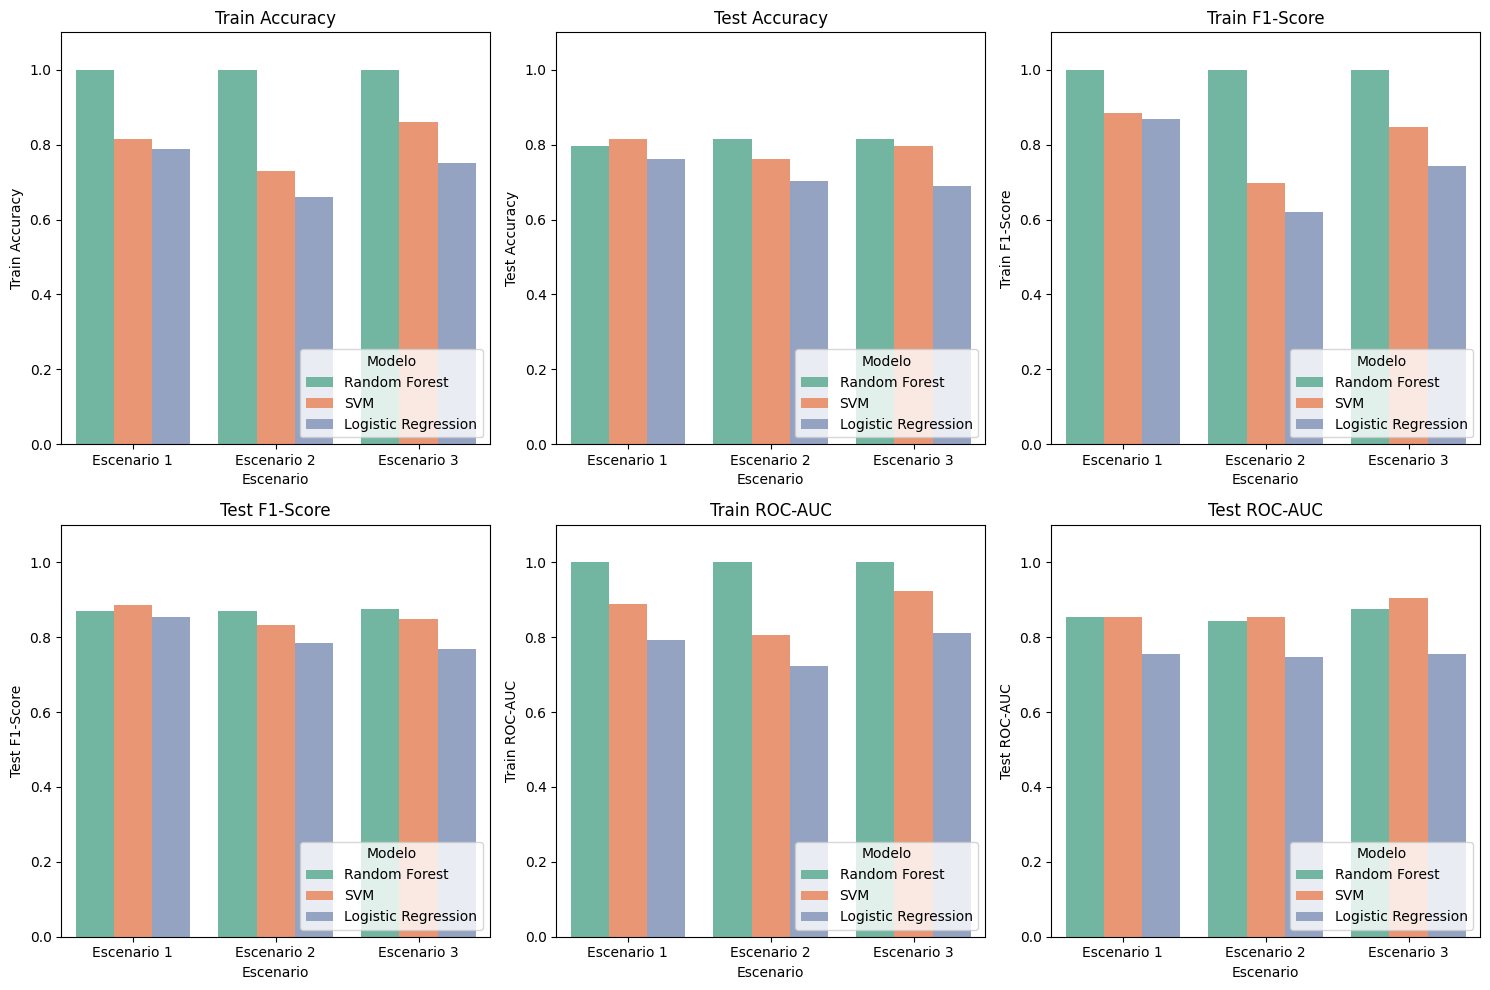

In [87]:
# Configuración general
plt.figure(figsize=(15, 10))

# Métricas para mostrar
metrics = ["Train Accuracy", "Test Accuracy", "Train F1-Score", "Test F1-Score", "Train ROC-AUC", "Test ROC-AUC"]

# Número de gráficos a generar
num_metrics = len(metrics)
colors = sns.color_palette("Set2", len(all_results["Model"].unique()))

# Crear un gráfico para cada métrica
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(
        data=all_results,
        x="Scenario",
        y=metric,
        hue="Model",
        palette=colors
    )
    plt.title(metric)
    plt.ylim(0, 1.1)  # Escala uniforme para todas las métricas
    plt.ylabel(metric)
    plt.xlabel("Escenario")
    plt.legend(title="Modelo", loc="lower right")

plt.tight_layout()
plt.show()


## Análisis de resultados y conclusiones

**Escenario 1** (Datos originales normalizador y ajustada dimensionalidad)
- Random Forest:
  - Métricas de prueba: Accuracy: `0.80`, F1-Score: `0.87`, ROC-AUC: `0.85`.
  - Muestra un buen equilibrio entre precisión y capacidad de discriminación. Sin embargo, las métricas perfectas en el entrenamiento (`1.00`) indican un claro sobreajuste.
- SVM:
  - Métricas de prueba: Accuracy: `0.82`, F1-Score: `0.88`, ROC-AUC: `0.85`.
  - El modelo destaca en este escenario, con un rendimiento ligeramente superior en prueba respecto a Random Forest.
- Logistic Regression:
  - Métricas de prueba: Accuracy: `0.76`, F1-Score: `0.85`, ROC-AUC: `0.75`.
  - Aunque es consistente, su capacidad de discriminación (ROC-AUC) es inferior a las otras técnicas.

**Escenario 2** (Datos balanceados con CNN)
- Random Forest:
  - Métricas de prueba: Accuracy: `0.82`, F1-Score: `0.87`, ROC-AUC: `0.84`.
  - Aunque las métricas en prueba son buenas, el modelo muestra un claro sobreajuste con métricas perfectas (`1.00`) en entrenamiento.
- SVM:
  - Métricas de prueba: Accuracy: `0.76`, F1-Score: `0.83`, ROC-AUC: `0.85`.
  - El rendimiento disminuye en comparación con el Escenario 1, probablemente debido a la reducción de instancias.
- Logistic Regression:
  - Métricas de prueba: Accuracy: `0.70`, F1-Score: `0.78`, ROC-AUC: `0.75`.
  - El desempeño es el más bajo en este escenario, lo que puede indicar que Logistic Regression no se beneficia de la reducción de instancias mediante CNN.

**Escenario 3** (Datos balanceados con SMOTE)
- Random Forest:
  - Métricas de prueba: Accuracy: `0.82`, F1-Score: `0.87`, ROC-AUC: `0.88`.
  - A pesar del buen rendimiento en prueba, el modelo muestra nuevamente un claro sobreajuste, con métricas perfectas (`1.00`) en el entrenamiento.
- SVM:
  - Métricas de prueba: Accuracy: `0.80`, F1-Score: `0.85`, ROC-AUC: `0.91`.
  - Ofrece un excelente equilibrio entre entrenamiento y prueba, con el mejor ROC-AUC en prueba (`0.91`), lo que lo posiciona como una opción sólida.
- Logistic Regression:
  - Métricas de prueba: Accuracy: `0.69`, F1-Score: `0.77`, ROC-AUC: `0.76`.
  - Aunque tiene un rendimiento más bajo, mantiene una relación equilibrada entre las métricas de entrenamiento y prueba.

---

**Conclusiones**

1. Mejor modelo: SVM con SMOTE (Escenario 3):
   - Este modelo logra un buen equilibrio entre las métricas de entrenamiento y prueba.
   - Tiene el mejor ROC-AUC en prueba (`0.91`), lo que indica una excelente capacidad de discriminación.
   - No muestra indicios significativos de sobreajuste.

2. Sobreajuste en Random Forest:
   - En todos los escenarios, Random Forest muestra métricas perfectas en entrenamiento (`1.00`), lo que indica que el modelo podría estar aprendiendo patrones específicos del conjunto de entrenamiento, en lugar de generalizar.
   - Es recomendable ajustar hiperparámetros como la profundidad de los árboles o el número máximo de nodos terminales para mitigar el sobreajuste.

3. Logistic Regression:
   - Aunque Logistic Regression tiene un rendimiento más bajo, es menos propenso al sobreajuste. Sin embargo, su menor capacidad de discriminación (ROC-AUC) lo posiciona como una opción menos atractiva en este caso.

4. Comparación entre técnicas de balanceo:
   - SMOTE (Escenario 3) parece ser más efectivo que CNN (Escenario 2), ya que proporciona más instancias balanceadas para el entrenamiento, lo que beneficia a modelos como SVM y Random Forest.

En resumen, SVM con SMOTE es la opción más equilibrada y robusta.











